## Time Series Forecasting

 - Here we have just one variable - **TIME**.
 - We can analyse this time series data in order to extract meaningful statistics and other characteristics.
 - It creates a **time series** model that helps to predict future value of a **time series** after observing previous data.

**What is Time Series?**

A time series is a set of observation taken at specified times usually at equal intervals. It is used to predict the future values based on the previous observed values. Here in the 'x-axis' we have the time and in the 'y-axis' we have the magnitude of the data.

Time series is used in
 - Business Forecasting : e.g. Predicting future of the Stock Market.
 - Understand Past Behaviour : e.g. When did the sells take a dip and when was it's pick during the past.
 - Plan Future : e.g. Forecasting the Future.
 - Evaluate Current Accomplishment : e.g. Present situation based on the past decision i.e. whether we have achieved what we wanted or not.

**Components of Time Series**

 - **Trend :** Movement to a relatively higher or lower values over a long period of time. So when the Time Series Abnalysis shows us a general pattern that is upwards then we call it as **Up trend**, and vice versa for a **Down trend**. And if there is no trend then we call it as **Horizontal trend or Stationary trend**. As if there is a new township constructed and a new store of hardware opened there. So at the begining people who will come to the town always buy the hardware from that shop. Now after some time when people get settled down there then the purchase of hardware goes down, so the sells of the hardware goes up for the first yeara and then by next year it goes down. It is the Trend but it is not a pattern, as trend happens for sometimes and then it disappears.
 
 
 - **Seasonality :** These are upwards or downwards swings but it is a repeating pattern within a fixed time period. Like Christmas happens every year at 25th December, now during that time sells of cakes go up every year for last 10 years. So it is a repeating pattern within a fixed time period.
 
 
 - **Irregularity :** It is also called **Noise**. These are erratic in nature also known as **Residuals**. It happens during a short duration and it is not repeating. Let's say suddenly there is an diarhea in a locality, so every people starts buying medicines for diarhea but after sometime everything settles down as diarhea goes away as a result sells of medicine for diarhea also goes down. So it is a situation that no one could have predicted, that is no one can forsee the diarhea condition and predicted huge jump in sells of medicines. So it is random variation.
 
 
 - **Cyclic :** It is repeating up and down movement. It has no fixed pattern that is it can happen after any time gap like 6 months, 1 year, 2 months or 10 years. So they keep on repeating but very hard to forecast.

**When not to apply Time Series Analysis?**

 - When values are constant. e.g. if the sells of cofee in a cofee shop remains around 500 for previous and present month then to predict the sells for the next month we cannot apply Time Series Analysis as the values are constant.
 - When values are in the form of functions. e.g. if we have sin(x) or cos(x), so in these cases we have the value of x and we can get the value just by putting it in a function.

**What is Stationarity?**

Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future.

**Ways to remove Stationarity:**
 - **Constant Mean :** the Mean should be constant according to the time.
 - **Constant Variance :** the Variance should be equal at different time intervals.
 - **Autocovariance** that does not depend on time.
 - There should not be any **seasonality**.
 
To check the Stationarity in Python we have 2 popular tests.

 - **Rolling Statistics:** Plot the moving average or moving variance and see if it varies with time. More of a visual technique.
 - **ADCF Test (Augmented Dicky Fuller Test):**  Null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical values.

- So once we can identify a series is not **stationary** then we need to convert it into **stationary**, so we can use the **time series** model on that.
- There are various methods to do that:
  - **differencing:** Here we subtract the values of a **time series** with the values of some previous time periods. Like if we have a linear trend **Y(t)**, and we do an operation named **First Differencing (first order)** where we subtract the present value **y(t)** with the previous day's value **y(t-1)**. So the formula becomes **[ y(t) - y(t-1) ]**. We can also apply **second order differencing (values 2 time periods gap)**, **third order differencing (values 3 time periods gap) etc**. The motive is to transform the graph into a **stationary** one.
  - We can also do **log** operations to smooth exponential curves **log(exp(x)=x)**.
  - Another way is **seasonal differencing** i.e. **[ y(t) - y(t-N) ]**. Here instead of subtracting values from the previous time period it subtracting values from the time cycle in which it was repeating. Here **N** is the time cycle where the pattern was repating.

### ARIMA Model

It is one of the best model to work in the TS data. Here AR and MA are two separate models. The Ar is the correlation between the previous time period with the current. There can be some noise which neede to be average out. 
 
Where,
 - AR : Auto Regressive (Model **P = autoregressive lags** is used here)
 - MA : Moving Average (Model **Q = moving average** is used here)
 - I : Integration i.e. (AR + MA) and (**d = Order of differentiation**)

### Demo:

### Problem:

**Build a model to forecast the demand(passenger traffic) in Airplanes. The data is classified in date/time and the passengers travelling per month. Now how many passengers are going to aboard these airlines in the month level in the future?**

In [1]:
import pandas as pd

In [2]:
passenger_df = pd.read_csv("data/airline.csv")
passenger_df.head(10)

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


**Now let's do the prediction**

In [3]:
## Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [27]:
## Parse strings to datetime type

from datetime import datetime
dataset = pd.read_csv("data/airline.csv")
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])
indexedDataset.head(5)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [28]:
indexedDataset.rename(columns = {'Thousands of Passengers':'Passengers'}, inplace = True)
indexedDataset.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [29]:
indexedDataset.tail(5)

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


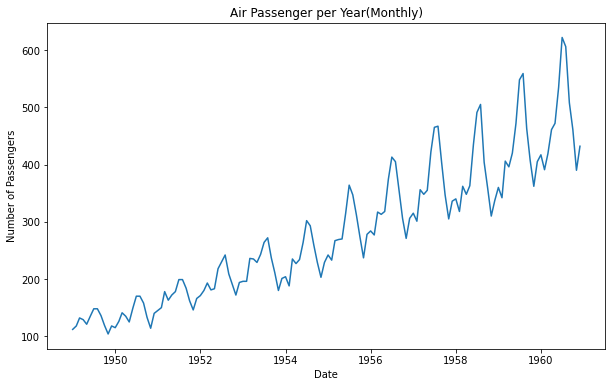

In [30]:
## Plot the graph

plt.title("Air Passenger per Year(Monthly)") 
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.plot(indexedDataset)

**Now check the Stationarity**

It has an upward trend and the Mean is not constant so this data is not Stationary.

Let's use the tests to check the Stationarity of the data.

In [31]:
## Determining rolling statistics
## window=12 means window of 12 months as the data is in month wise

rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()

print(f"So the Mean is:{rolmean} and Standard Deviation is:{rolstd}.")

So the Mean is:            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns] and Standard Deviation is:            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns].


The first 11 numbers are NaN as we have calculated all the averages of these 11 and given over to the equation.

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

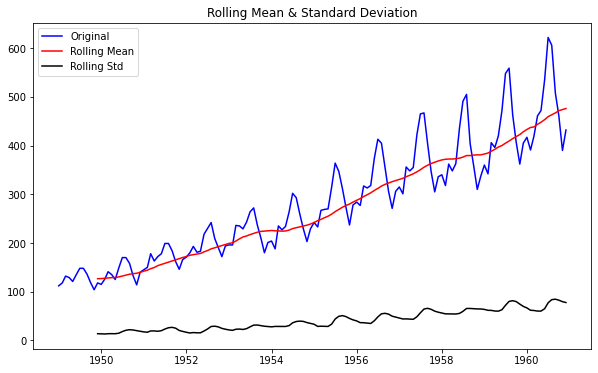

In [32]:
## Let's plot this rolling statistics bar

orig = plt.plot(indexedDataset, color="blue", label="Original")
mean = plt.plot(rolmean, color="red", label="Rolling Mean")
std = plt.plot(rolstd, color="black", label="Rolling Std")

plt.legend(loc='best')
plt.title("Rolling Mean & Standard Deviation")

The Mean and Standard Deviation is not constant so the data is not Stationary.

In [34]:
## Performing Dickey-Fuller Test:
# AIC = Achichey Information Criterion, it gives us what we want in the Time Series. 
# The number of lags is chosen to minimize the corresponding information criterion.
## autolag : Method to use when automatically determining the lag.

from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-Fuller Test:")
dftest = adfuller(indexedDataset['Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Here the p-value is very high (must stay around 0.5) also the Critical Value is more than the Test Statistic, so here we cannot reject the Null hypothesis and can say that the data is not Stationary.

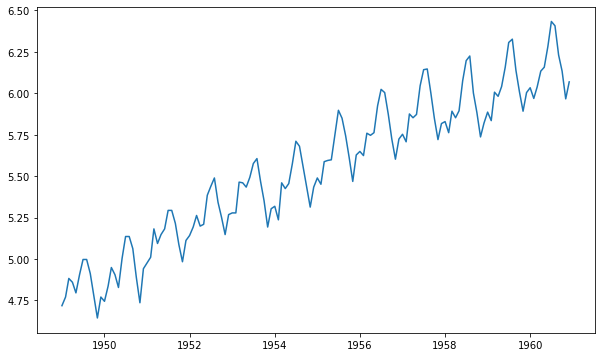

In [35]:
## Let's estimate the trend

indexedDataset_logscale = np.log(indexedDataset)
plt.plot(indexedDataset_logscale)

Here the values of y-axis has changed as the scale has changed but the trend remains the same.

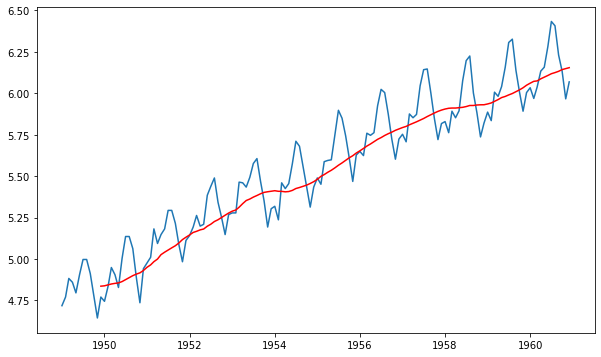

In [36]:
## Let's calculate the moving average with the same window but here we will use the log scale

movingAverage = indexedDataset_logscale.rolling(window=12).mean()
movingStd = indexedDataset_logscale.rolling(window=12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingAverage, color='red')

Here also Mean is not Stationary but better than the previous one.

In [37]:
## Let's calculate the difference between the moving average and the actual number of passengers


dataset_LogScale_Minus_Moving_Average = indexedDataset_logscale - movingAverage
dataset_LogScale_Minus_Moving_Average.head(12)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [38]:
## Printing it again after removing the NaN values

dataset_LogScale_Minus_Moving_Average.dropna(inplace=True)
dataset_LogScale_Minus_Moving_Average.head(10)

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [41]:
## The total code of the ADCF Test in one place:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # Let's plot this rolling statistics bar
    orig = plt.plot(timeseries, color="blue", label="Original")
    mean = plt.plot(movingAverage, color="red", label="Rolling Mean")
    std = plt.plot(movingSTD, color="black", label="Rolling Std")
    plt.legend(loc='best')
    plt.title("Rolling Mean & Standard Deviation")
    
    # Performing Dickey-Fuller Test:
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


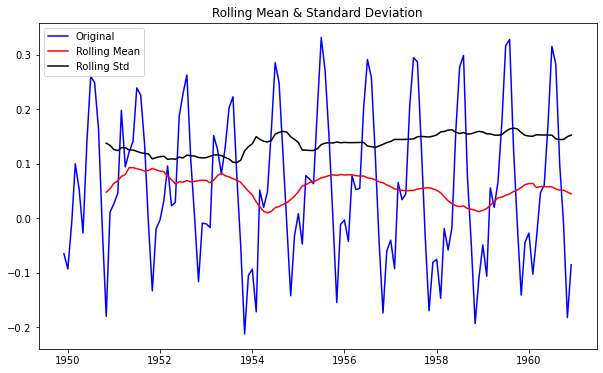

In [42]:
## Let's see the result

test_stationarity(dataset_LogScale_Minus_Moving_Average)

Now here is no trend and it is much better than what we had earlier. Here the p-Value also goes down below 0.5, also the Critical Value and Test Statistics value is almost equal.

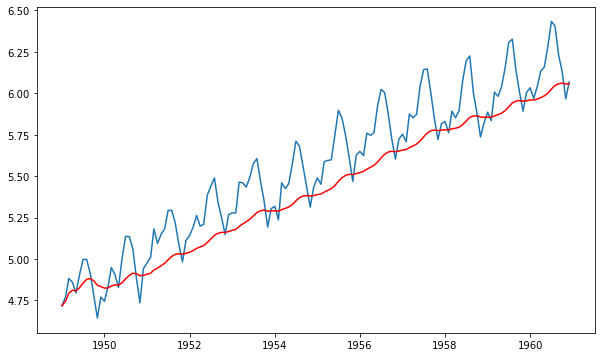

In [43]:
## Let's calculate Weighted Average of Time Series to see the trend

exponential_Decay_Weighted_Average = indexedDataset_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponential_Decay_Weighted_Average, color='red')

As the Time Series is progressive the average is also progressing towards the higher side.

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


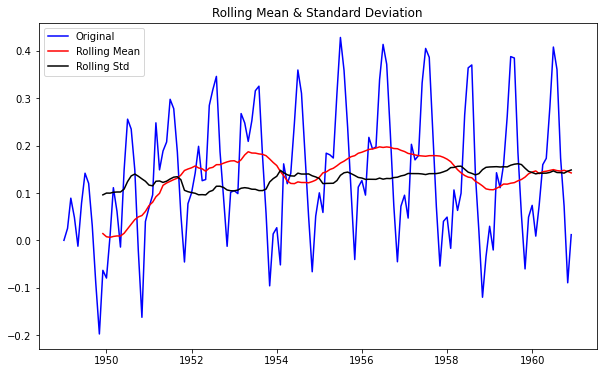

In [44]:
## Let's calculate the difference between the moving average and the actual number of passengers
## But here we will use weighted mean inplace of normal mean like earlier and then check for stationarity

dataset_LogScale_Minus_Moving_Exponential_Decay_Average = indexedDataset_logscale - exponential_Decay_Weighted_Average
test_stationarity(dataset_LogScale_Minus_Moving_Exponential_Decay_Average)

Here the Standard Deviation becomes flatter and we can say that there is no trend in the data. Also the rolling Mean is greater that the previous one. The p-Value becomes even more smaller, so we can say that the Time Series is stationary.

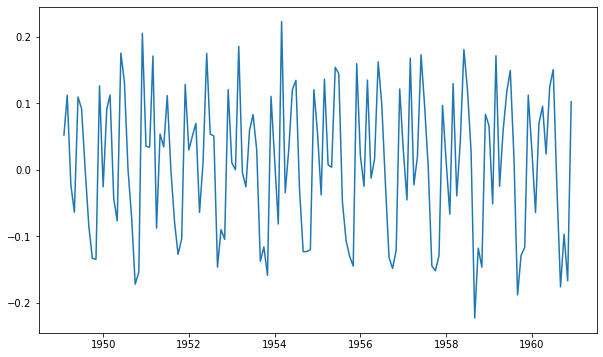

In [45]:
## Let's shift the values into Time Series so we can use them for forecasting
## Here we will use shift() to shift all the values

dataset_Log_Diff_Shifting = indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(dataset_Log_Diff_Shifting)

Here we have taken the lag as 1 so here we just shift the values by 1.

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


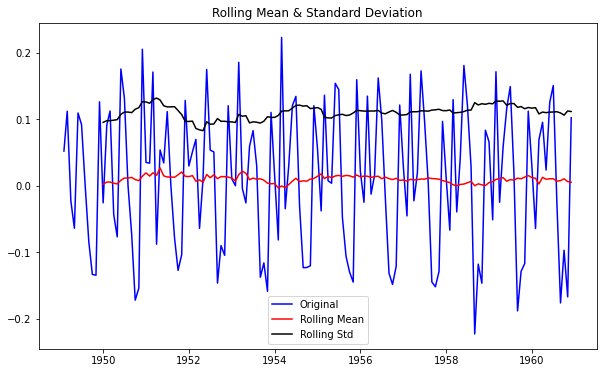

In [46]:
## Let's see the output after dropping the NaN values

dataset_Log_Diff_Shifting.dropna(inplace=True)
test_stationarity(dataset_Log_Diff_Shifting)

Here the output is quite flat, so the Null hypothesis is rejected and we can say that the Time Series is stationary now.

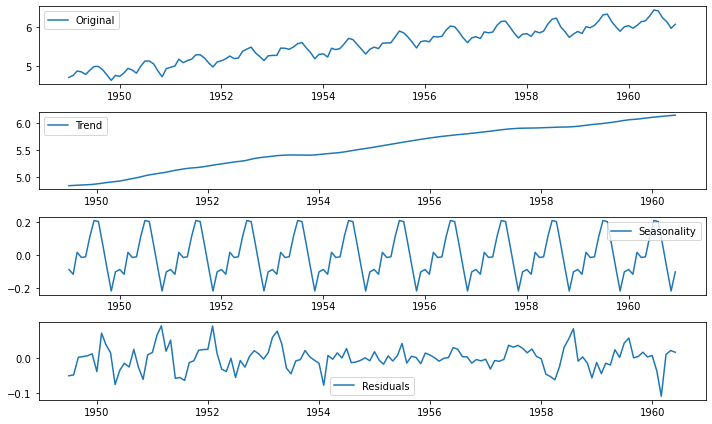

In [50]:
## Let's see the components of time series:


from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logscale)


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(indexedDataset_logscale, label="Original")
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc='best')
plt.tight_layout()



Results of Dickey-Fuller Test:


KeyError: 'Passengers'

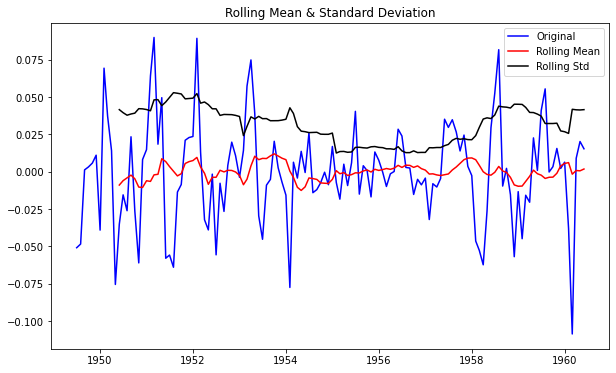

In [51]:
## Let's check the noise if it is stationary or not

decomposed_log_Data = residual
decomposed_log_Data.dropna()
test_stationarity(decomposed_log_Data)

C:\Users\Arunava\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


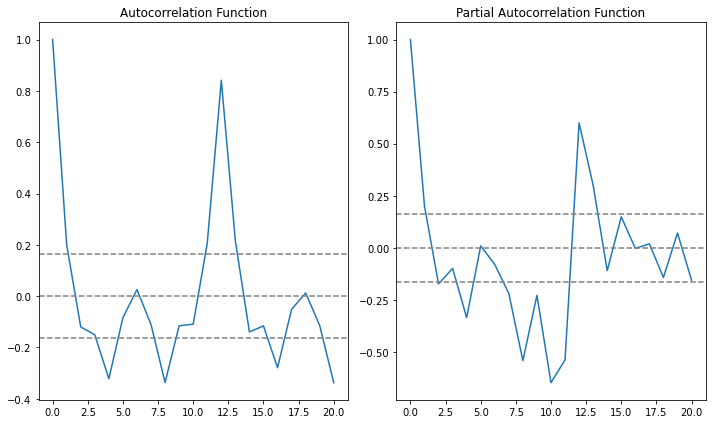

In [52]:
## Let's graph ACF and PACF
## In order to calculate the value of 'Q' we need ACF graph
## In order to calculate the value of 'P' we need PACF graph
## ols = Ordinary Least Square method

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dataset_Log_Diff_Shifting, nlags=20)
lag_pacf =pacf(dataset_Log_Diff_Shifting, nlags=20, method='ols')


# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset_Log_Diff_Shifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_Log_Diff_Shifting)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")


# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset_Log_Diff_Shifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_Log_Diff_Shifting)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

To calculate the P and Q values we need to check where the graphs drops to 0 for the first time. From the above picture we can say that value of P is almost 2 and the value of Q is also 2.

Now we have the value of P, Q and d so now we can substitute them in the ARIMA model.

C:\Users\Arunava\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arunava\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting AR Model


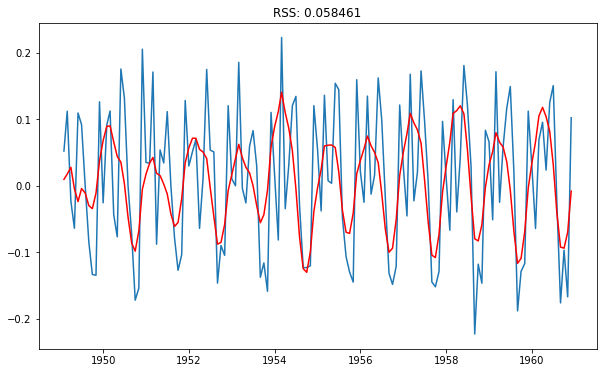

In [56]:
from statsmodels.tsa.arima_model import ARIMA

# AR Model
# here P=2, d=1, Q=2
# RSS = Residuals Sum of Squares
model = ARIMA(indexedDataset_logscale, order=(2, 1, 2))
results_AR = model.fit(disp=-1)
plt.plot(dataset_Log_Diff_Shifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %4f'% sum(results_AR.fittedvalues - dataset_Log_Diff_Shifting["Passengers"])**2)
print('Plotting AR Model')

So the RSS is 0.58 which is good. As greater RSS is bad. We can play with the parameters here that is the P, Q and d. Like if we change the values of the parameter to 0, 1, 2 then the RSS will be 0.0013.

C:\Users\Arunava\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arunava\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting MA Model


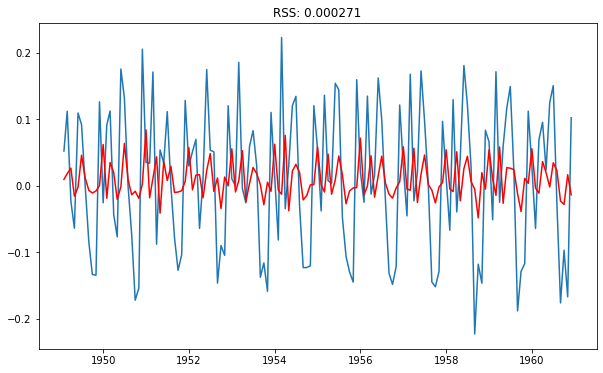

In [58]:
# MA Model
# here Q=0
model = ARIMA(indexedDataset_logscale, order=(2, 1, 0))
results_MA = model.fit(disp=-1)
plt.plot(dataset_Log_Diff_Shifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %4f'% sum(results_MA.fittedvalues - dataset_Log_Diff_Shifting["Passengers"])**2)
print('Plotting MA Model')

C:\Users\Arunava\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arunava\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting ARIMA Model


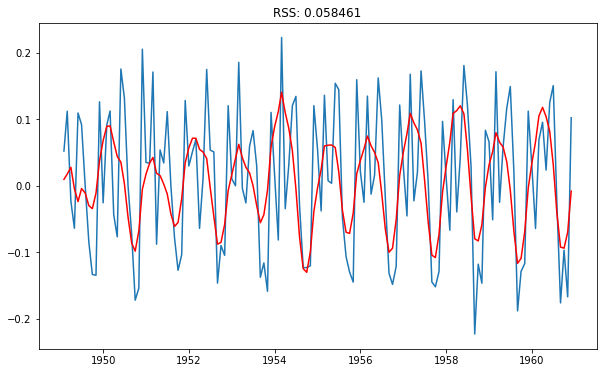

In [59]:
## Now let's make ARIMA model

model = ARIMA(indexedDataset_logscale, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dataset_Log_Diff_Shifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %4f'% sum(results_ARIMA.fittedvalues - dataset_Log_Diff_Shifting["Passengers"])**2)
print('Plotting ARIMA Model')

In [60]:
## Now fit them in a combined model
## Here we have convert the fitted values into series format

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [61]:
## Convert to cumulative sum

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [63]:
## This is the predictions for the fitted values

predictions_ARIMA_log = pd.Series(indexedDataset_logscale['Passengers'], 
                                  index=indexedDataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846011
dtype: float64

**These previous 3 steps are very important for the data transformation i.e. cumulative sum, predictions and exponential.**

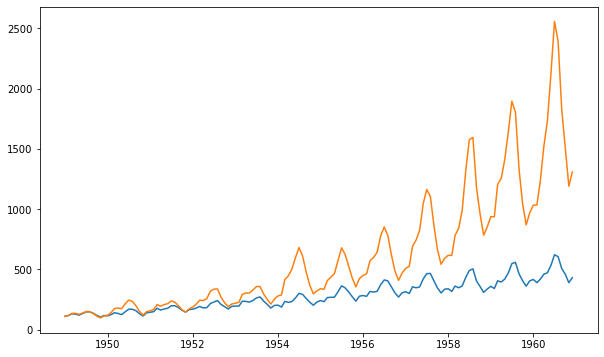

In [64]:
## This is the exponential of the whole data 
# so it come back to it's original form from where we have started using it.

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [65]:
## How many rows in the dataset

indexedDataset_logscale

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


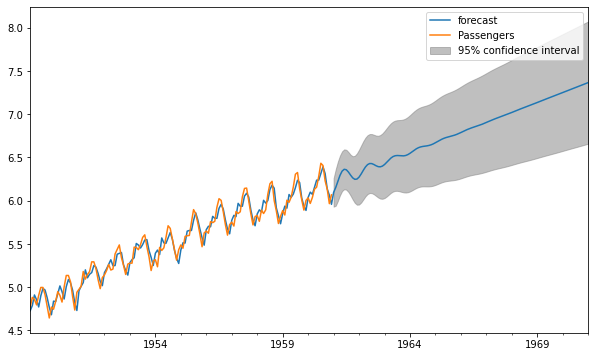

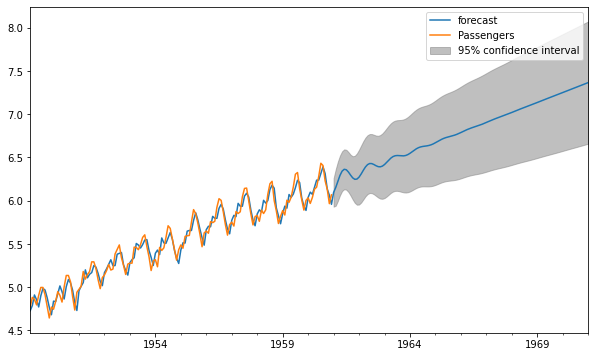

In [66]:
## Prediction for next 10 year so the number of datapoints is 120 and 264 is because we have 144 rows + 10 years.
## So 144 +120  = 264 data points
## ARIMA.plot_predict(index 0f the time series, number of datapoints we want the time series for)

results_ARIMA.plot_predict(1,264)

Now whatever happens the forecast (blue line) will not breach the confidence level that is the gray part.

In [67]:
## Here it is the predictions using the data points.

results_ARIMA.forecast(steps=120)

(array([6.09553403, 6.15281422, 6.22442988, 6.2924112 , 6.34164726,
        6.36359361, 6.35784676, 6.33139289, 6.29597526, 6.26447706,
        6.24738327, 6.25025182, 6.27275853, 6.3094033 , 6.35151508,
        6.38988662, 6.41727379, 6.43011043, 6.42906673, 6.41842471,
        6.40456141, 6.39403609, 6.39183084, 6.40019511, 6.41833704,
        6.44295418, 6.46937442, 6.49293985, 6.5102411 , 6.51989019,
        6.52267561, 6.5211237 , 6.51864514, 6.51853682, 6.52311921,
        6.53322363, 6.54812874, 6.5659156 , 6.58410307, 6.60036533,
        6.61313254, 6.62192765, 6.62737771, 6.63093112, 6.63438676,
        6.63937976, 6.64696499, 6.65739838, 6.67015322, 6.68414247,
        6.69806619, 6.7107789 , 6.72157717, 6.73033967, 6.73749793,
        6.74386362, 6.75037308, 6.75782581, 6.76668672, 6.77699815,
        6.7884131 , 6.80032843, 6.81207182, 6.82308745, 6.83307119,
        6.84202474, 6.85022293, 6.85811203, 6.86617323, 6.87479136,
        6.88416288, 6.8942637 , 6.90487875, 6.91